In [1]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


### Importing 2014 survey data

In [2]:
data_frames = []

data_paths = [
r'C:\Users\asg_a_1p8y6mm\OneDrive\Desktop\WIOA Training\DataAnalytics\Module 7\Module 7; Class Project\Data Cleaning 2014\survey.csv'
]

col_renames = {
       'Age':'Age', 'Gender':'Gender', 'Country':'Country', 'state':'state', 'self_employed':'self-employed',
       'family_history':'family history', 'treatment':'treatment', 'work_interfere':'work interfere', 'no_employees':'number of employees',
       'remote_work':'remote work', 'tech_company':'tech company', 'benefits':'benefits', 'care_options':'care options',
       'wellness_program':'wellness program', 'seek_help':'seek help', 'anonymity':'anonimity', 'leave':'leave',
       'mental_health_consequence':'mental health consequence', 'phys_health_consequence':'physical health consequence', 'coworkers':'coworkers',
       'supervisor':'supervisor', 'mental_health_interview':'mental health interview', 'phys_health_interview':'physical health interview',
       'mental_vs_physical':'mental vs physical', 'obs_consequence':'obs consequence',
}

col_to_keep = col_renames.keys()


In [3]:
for path in data_paths:
  print("\nReading file: ", path)
  df = pd.read_csv(path)
  print('Shape - default: ', df.shape)

  # We have a lot of columns and many with a lot of missing values. let's filter those columns and keep only those who have less than 90% missing values.
  max_na_filter = (0.9 * len(df))
  df = df.loc[:,(df.isnull().sum(axis = 0) <= max_na_filter)]
  print('Shape - filtered: ', df.shape)

  # Removing not needed columns
  col_to_drop = [item for item in df.columns if item not in col_to_keep]
  df.drop(columns = col_to_drop, inplace = True, errors = 'ignore')
  print('Shape - column filtered: ', df.shape)

  # Renaming columns
  df.rename(columns = col_renames, inplace = True) 

  # Storing data frames in list
  data_frames.append(df)


Reading file:  C:\Users\asg_a_1p8y6mm\OneDrive\Desktop\WIOA Training\DataAnalytics\Module 7\Module 7; Class Project\Data Cleaning 2014\survey.csv
Shape - default:  (1259, 27)
Shape - filtered:  (1259, 27)
Shape - column filtered:  (1259, 25)


In [4]:
data_df = pd.concat(data_frames, ignore_index = True)
print('Shape - combined data: ', data_df.shape)
print('Shape - combined data: ', df.shape)

Shape - combined data:  (1259, 25)
Shape - combined data:  (1259, 25)


In [5]:
data_df.head(10)

,Age,Gender,Country,state,self-employed,family history,treatment,work interfere,number of employees,remote work,...,anonimity,leave,mental health consequence,physical health consequence,coworkers,supervisor,mental health interview,physical health interview,mental vs physical,obs consequence
0,37,Female,United States,IL,NaN,No,Yes,Often,6-25,No,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,No,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,No,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,United States,TX,NaN,No,No,Never,100-500,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No
5,33,Male,United States,TN,NaN,Yes,No,Sometimes,6-25,No,...,Don't know,Don't know,No,No,Yes,Yes,No,Maybe,Don't know,No
6,35,Female,United States,MI,NaN,Yes,Yes,Sometimes,1-5,Yes,...,No,Somewhat difficult,Maybe,Maybe,Some of them,No,No,No,Don't know,No
7,39,M,Canada,NaN,NaN,No,No,Never,1-5,Yes,...,Yes,Don't know,No,No,No,No,No,No,No,No
8,42,Female,United States,IL,NaN,Yes,Yes,Sometimes,100-500,No,...,No,Very difficult,Maybe,No,Yes,Yes,No,Maybe,No,No
9,23,Male,Canada,NaN,NaN,No,No,Never,26-100,No,...,Don't know,Don't know,No,No,Yes,Yes,Maybe,Maybe,Yes,No


### Data Cleaning

In [6]:
# lets check number of empty rows in data
data_df.isna().sum().sort_values()

Age                              0
physical health interview        0
mental health interview          0
supervisor                       0
coworkers                        0
physical health consequence      0
mental health consequence        0
leave                            0
anonimity                        0
seek help                        0
wellness program                 0
mental vs physical               0
care options                     0
tech company                     0
remote work                      0
number of employees              0
treatment                        0
family history                   0
Country                          0
Gender                           0
benefits                         0
obs consequence                  0
self-employed                   18
work interfere                 264
state                          515
dtype: int64

##### tech_related_role

In [7]:
# Since we are targetting tech related employees, setting default input values will make incorrect analysis, 
# hence removing the empty value rows 
data_df = data_df[data_df['tech company'].notna()]


In [8]:
# Lets see the values in our interested column
data_df['tech company'].value_counts()

tech company
Yes    1031
No      228
Name: count, dtype: int64

In [9]:
# Lets remove those records who do not have tech related job
data_df.drop(data_df[data_df['tech company'] == 0.0].index, inplace = True)

# now since all of our data contains records who have tech related job, we can safely remove the column
data_df.drop(columns = 'tech company', inplace = True)


##### self-employed

In [10]:
# There are 18 records with missing self-employed values, instead of removing, lets mark those as others.
data_df['self-employed'] = data_df['self-employed'].fillna('Other')

# format the records
data_df['self-employed'] = data_df['self-employed'].str.lower().str.strip()

In [11]:
# Lets see the values in our interested column
data_df['self-employed'].value_counts()

self-employed
no       1095
yes       146
other      18
Name: count, dtype: int64

##### state

In [12]:
# There are 515 records with missing state values, instead of removing, lets mark those as others.
data_df['state'] = data_df['state'].fillna('Other')

# format the records
data_df['state'] = data_df['state'].str.lower().str.strip()

In [13]:
# Lets see the values in our interested column
data_df['state'].value_counts()

state
other    515
ca       138
wa        70
ny        57
tn        45
tx        44
oh        30
il        29
or        29
pa        29
in        27
mi        22
mn        21
ma        20
fl        15
nc        14
va        14
wi        12
ga        12
mo        12
ut        11
co         9
md         8
al         8
az         7
ok         6
nj         6
ky         5
sc         5
ia         4
ct         4
dc         4
nv         3
vt         3
sd         3
ks         3
nh         3
wy         2
nm         2
ne         2
wv         1
id         1
ms         1
ri         1
la         1
me         1
Name: count, dtype: int64

##### work interfere

In [14]:
# There are 264 records with missing work interfere values, instead of removing, lets mark those as others.
data_df['work interfere'] = data_df['work interfere'].fillna('Other')

# format the records
data_df['work interfere'] = data_df['work interfere'].str.lower().str.strip()

In [15]:
# Lets see the values in our interested column
data_df['work interfere'].value_counts()

work interfere
sometimes    465
other        264
never        213
rarely       173
often        144
Name: count, dtype: int64

##### Gender

In [16]:
# a lot of inconsistent records exists in our gender, lets break all these in our required groups.

gender_male = ['male', 'M', 'Make', 'Male ', 'Man', 'Cis Male', 'msle', 'male leaning androgynous', 'Mail', 'Malr', 'Cis Man', 'Guy (-ish) ^_^', 'ostensibly male, unsure what that really means', 'Male (CIS)', 'Mal', 'maile', 'Male-ish', 'Androgyne', 'something kinda male?', 'm', 'man', 'male/he/him', 'let\'s keep it simple and say \"male\"', 'mostly male', 'masculine', 'identify as male', 'masculino', 'cishet male', 'cis male', 'mail', 'male-ish', 'cis-male', 'male (cis)', 'cis hetero male', 'dude', 'cisgender male', 'male, born with xy chromosoms', 'swm', 'ostensibly male']
gender_female = ['female', 'f', 'F', 'woman', 'Woman', 'Female ', 'Female (cis)', 'cis-female/femme', 'Femake', 'Cis Female', 'female, she/her', 'femile', 'female (cis)', 'f, cisgender', 'cisgendered woman', 'femmina', 'cis female', 'cis woman', 'cis-female', 'genderqueer demigirl', 'female (cisgender)', 'my sex is female.', 'femail', 'femalw', 'nonbinary/femme', 'cisgender female', 'she/her/they/them', '*shrug emoji* (f)',  'female/gender non-binary.', 'i identify as female']
gender_other = ['agender', 'Female (trans)', 'Genderqueer', 'A little about you', 'queer', 'Neuter', 'Trans woman', 'Agender', 'fluid', 'Enby', 'All', 'Nah', 'queer/she/they', 'Trans-female', 'p', 'nonbinary', 'nb', 'b', 'gender non-conforming woman', 'demiguy', 'trans non-binary/genderfluid', 'other', 'afab non-binary', 'sometimes', 'questioning', 'none', 'trans man', 'trans woman', 'trans female', 'non-binary/agender', 'make', 'agender trans woman', 'transfeminine', 'genderqueer/non-binary', 'non binary', 'contextual', 'agender/genderfluid', 'non-binary', 'genderfluid', 'god king of the valajar', 'uhhhhhhhhh fem genderqueer?', 'transgender', 'genderqueer', 'homem cis']

# lets transfor gender in simpler form
data_df['Gender'] = data_df['Gender'].replace(gender_male, 'Male')
data_df['Gender'] = data_df['Gender'].replace(gender_female, 'Female')
data_df['Gender'] = data_df['Gender'].replace(gender_other, 'Other')

# lets check records now
data_df['Gender'].value_counts()



Gender
Male      996
Female    247
Other      16
Name: count, dtype: int64

#### benefits

In [17]:
# lets check number of empty rows in data again
data_df.isna().sum().sort_values()

Age                            0
physical health interview      0
mental health interview        0
supervisor                     0
coworkers                      0
physical health consequence    0
mental health consequence      0
leave                          0
anonimity                      0
seek help                      0
wellness program               0
care options                   0
benefits                       0
remote work                    0
number of employees            0
work interfere                 0
treatment                      0
family history                 0
self-employed                  0
state                          0
Country                        0
Gender                         0
mental vs physical             0
obs consequence                0
dtype: int64

In [18]:
# we dont have any missing rows now, lets first see what are different values present
data_df['benefits'].value_counts()

benefits
Yes           477
Don't know    408
No            374
Name: count, dtype: int64

In [19]:
# Not eligible for coverage / NA is same as No. Lets update
data_df.loc[data_df['benefits'] == 'Not eligible for coverage / NA' , 'benefits'] = 'No'

data_df['benefits'].value_counts()

benefits
Yes           477
Don't know    408
No            374
Name: count, dtype: int64

#### care options

In [20]:
data_df['care options'].value_counts()

care options
No          501
Yes         444
Not sure    314
Name: count, dtype: int64

No ambiguity in `care options` column.

#### supervisor

In [21]:
data_df['supervisor'].value_counts()

supervisor
Yes             516
No              393
Some of them    350
Name: count, dtype: int64

#### coworkers

In [22]:
data_df['coworkers'].value_counts()

coworkers
Some of them    774
No              260
Yes             225
Name: count, dtype: int64

In [23]:
# Now all missing data is fixed.
# Lets see our total records now

data_df.shape

(1259, 24)

#### age

In [24]:
# lets see what values we have
data_df['Age'].describe().astype(int)

count          1259
mean       79428148
std     -2147483648
min           -1726
25%              27
50%              31
75%              36
max     -2147483648
Name: Age, dtype: int32

In [25]:
# We can see irregularites in age, lets try to address these

# Get mean age
mean_age = data_df[(data_df["Age"] >= 18) | (data_df["Age"] <= 75)]["Age"].mean()

# Replace irregular age numbers with mean value
data_df["Age"].replace(to_replace = data_df[(data_df["Age"] < 18) | (data_df["Age"] > 75)]["Age"].tolist(), value = mean_age, inplace = True)

data_df['Age'].describe().astype(int)

C:\Users\asg_a_1p8y6mm\AppData\Local\Temp\ipykernel_65728\2186853515.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_df["Age"].replace(to_replace = data_df[(data_df["Age"] < 18) | (data_df["Age"] > 75)]["Age"].tolist(), value = mean_age, inplace = True)


count        1259
mean       504738
std       6313856
min            18
25%            27
50%            31
75%            36
max      79428148
Name: Age, dtype: int32

### Feature reduction

In [26]:
# Lets see our unique data types
data_df.nunique()

Age                            46
Gender                          3
Country                        48
state                          46
self-employed                   3
family history                  2
treatment                       2
work interfere                  5
number of employees             6
remote work                     2
benefits                        3
care options                    3
wellness program                3
seek help                       3
anonimity                       3
leave                           5
mental health consequence       3
physical health consequence     3
coworkers                       3
supervisor                      3
mental health interview         3
physical health interview       3
mental vs physical              3
obs consequence                 2
dtype: int64

In [27]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Age                          1259 non-null   float64
 1   Gender                       1259 non-null   object 
 2   Country                      1259 non-null   object 
 3   state                        1259 non-null   object 
 4   self-employed                1259 non-null   object 
 5   family history               1259 non-null   object 
 6   treatment                    1259 non-null   object 
 7   work interfere               1259 non-null   object 
 8   number of employees          1259 non-null   object 
 9   remote work                  1259 non-null   object 
 10  benefits                     1259 non-null   object 
 11  care options                 1259 non-null   object 
 12  wellness program             1259 non-null   object 
 13  seek help         

### Data Analysis / Visualization

In [28]:
colors = sns.color_palette('pastel')[0:5]

#### age

In [29]:
data_df['Age'].describe()

count    1.259000e+03
mean     5.047381e+05
std      6.313857e+06
min      1.800000e+01
25%      2.700000e+01
50%      3.100000e+01
75%      3.600000e+01
max      7.942815e+07
Name: Age, dtype: float64

<Axes: ylabel='Proportions of Gender in tech industry'>

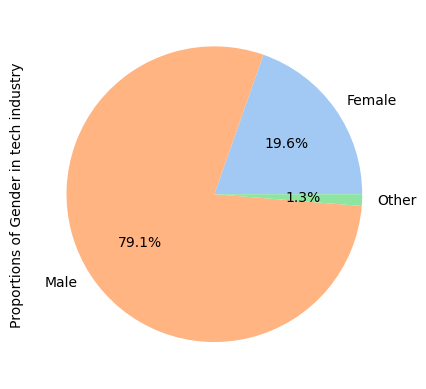

In [30]:
# Proportions of Gender in tech industry
data_df.groupby(['Gender']).size().plot(kind = 'pie', autopct = '%1.1f%%', label = 'Proportions of Gender in tech industry', colors = colors)

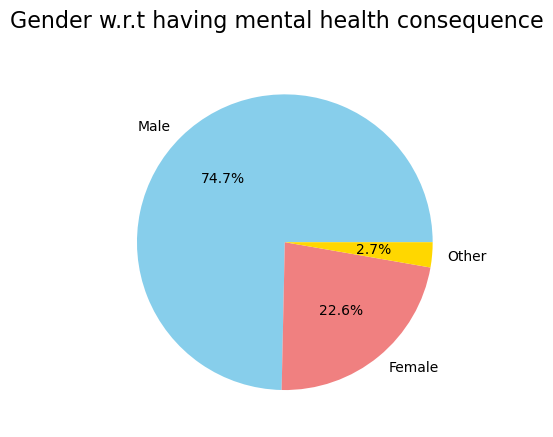

In [31]:
male_with_mental_health = data_df[(data_df["mental health consequence"] == 'Yes') & (data_df["Gender"] == 'Male')]
female_with_mental_health = data_df[(data_df["mental health consequence"] == 'Yes') & (data_df["Gender"] == 'Female')]
other_with_mental_health = data_df[(data_df["mental health consequence"] == 'Yes') & (data_df["Gender"] == 'Other')]

sizes = [
    len(male_with_mental_health),
    len(female_with_mental_health),
    len(other_with_mental_health)
]
labels = ['Male', 'Female', 'Other']
colors = ['skyblue', 'lightcoral', 'gold'] # Define your colors

fig1, ax1 = plt.subplots()
fig1.suptitle('Gender w.r.t having mental health consequence', fontsize=16)
ax1.pie(x=sizes, labels=labels, autopct='%1.1f%%', colors=colors)  # Use x=sizes
plt.show()

Following observations can be derived from above.

- Around 75% of male employes have mental health issues while 23% female are effected with mental illness. 

#### Mental health consequence distribution by age and gender

In [32]:
data_df['mental health consequence'].describe()

count     1259
unique       3
top         No
freq       490
Name: mental health consequence, dtype: object

<Axes: ylabel='Have mental health issues?'>

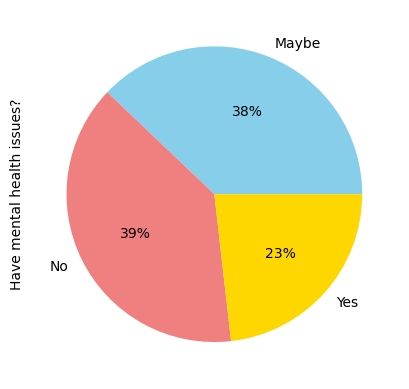

In [33]:
data_df.groupby(['mental health consequence']).size().plot(kind='pie', autopct='%1.0f%%', label='Have mental health issues?', colors = colors)

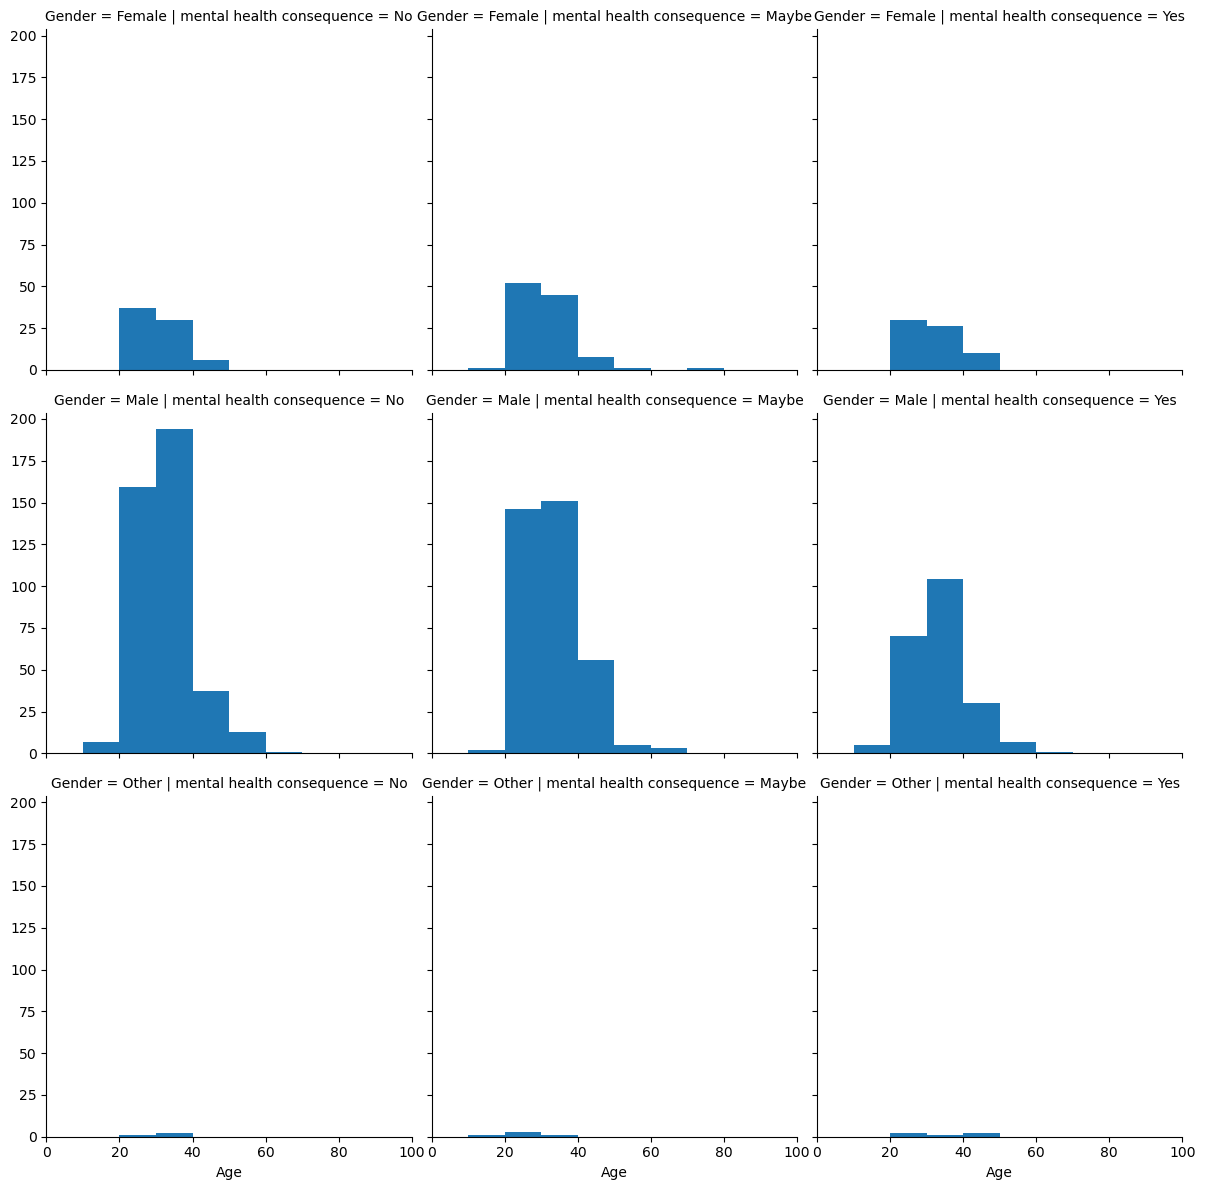

In [34]:
# It can be seen as mostly say Yes and mostly are Men in their 30s in our data. So lets plot them together to further analyze

g = sns.FacetGrid(data_df, row='Gender', col='mental health consequence', height=4)
g.map(plt.hist, 'Age', bins=range(0, 101, 10)) # Bins from 0 to 100 with a width of 10
g.set(xlim=(0, 100))  # Set x-axis limits
g.add_legend()
plt.show()


Following observations can be derived from above.

- The highest proportion of men with menal illness occurs for men in their 30s.
- Mostly employees whose gender falls under 'Others' catgory hav less to no mental health issues.


#### Are companies taking Mental Health issues seriously?


<Axes: ylabel='MH Coverage Provided? '>

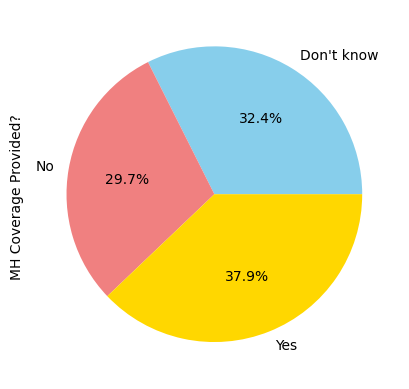

In [35]:
data_df.groupby(['benefits']).size().plot(kind = 'pie', autopct = '%1.1f%%', label = 'MH Coverage Provided? ', colors = colors)

<Axes: ylabel='MH Resources Provided? '>

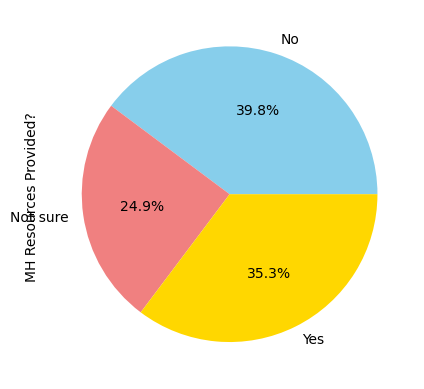

In [36]:
data_df.groupby(['care options']).size().plot(kind = 'pie', autopct = '%1.1f%%', label = 'MH Resources Provided? ', colors = colors)

Following observations can be derived from above.

- More than 35% employee have medical coverage provided from employer, but not the resources to get more information, suggesting that companies do not get active involvement.
- Around 40% employee do not have medical coverage.

#### How easy is discussing Mental Health at Work?


<Axes: ylabel='Discuss MH with Employer? '>

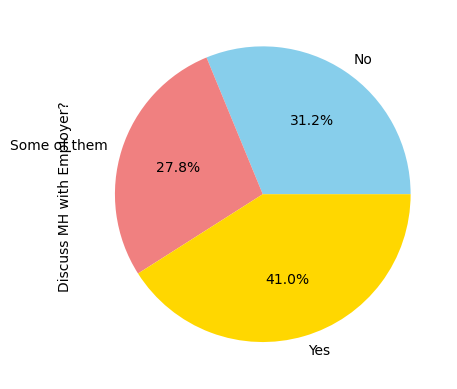

In [37]:
data_df.groupby(['supervisor']).size().plot(kind = 'pie', autopct = '%1.1f%%', label = 'Discuss MH with Employer? ', colors = colors)

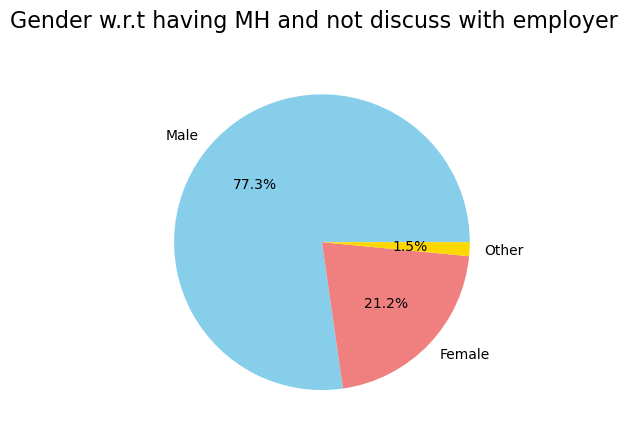

In [38]:
male_has_mh_and_not_discussed = data_df[(data_df["mental health consequence"] == 'Yes') & (data_df["Gender"] == 'Male') & (data_df["supervisor"] == 'No')]
female_has_mh_and_not_discussed = data_df[(data_df["mental health consequence"] =='Yes') & (data_df["Gender"] == 'Female') & (data_df["supervisor"] == 'No')]
other_has_mh_and_not_discussed = data_df[(data_df["mental health consequence"] =='Yes') & (data_df["Gender"] == 'Other') & (data_df["supervisor"] == 'No')]

sizes = [
    len(male_has_mh_and_not_discussed),
    len(female_has_mh_and_not_discussed),
    len(other_has_mh_and_not_discussed)
]
labels = ['Male', 'Female', 'Other']
colors = ['skyblue', 'lightcoral', 'gold'] # Define colors

fig1, ax1 = plt.subplots()
fig1.suptitle('Gender w.r.t having MH and not discuss with employer', fontsize=16)
ax1.pie(x=sizes, labels=labels, autopct='%1.1f%%', colors=colors) # Use x=sizes
plt.show()

<Axes: ylabel='Discuss MH with Co-workers?? '>

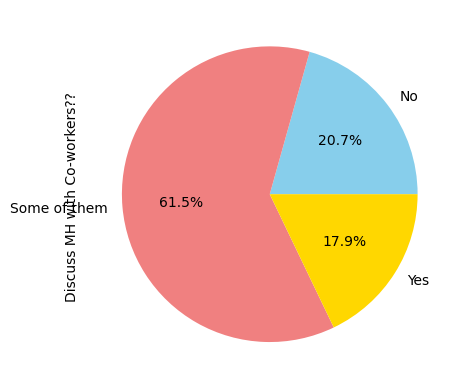

In [39]:
data_df.groupby(['coworkers']).size().plot(kind = 'pie', autopct = '%1.1f%%', label = 'Discuss MH with Co-workers?? ', colors = colors)

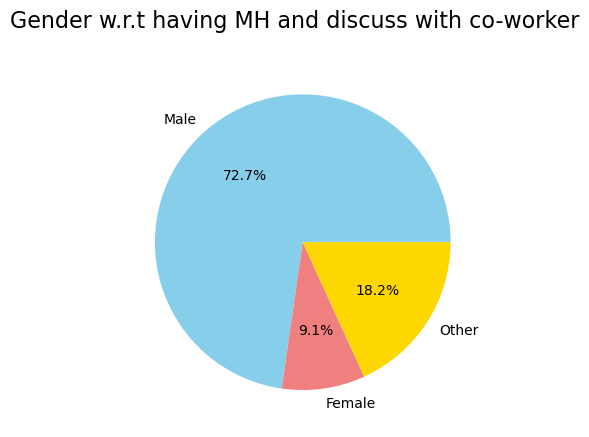

In [40]:
male_discussed_with_coworkers = data_df[(data_df["mental health consequence"] == 'Yes') & (data_df["Gender"] == 'Male') & (data_df["coworkers"] == 'Yes')]
female_discussed_with_coworkers = data_df[(data_df["mental health consequence"] == 'Yes') & (data_df["Gender"] == 'Female') & (data_df["coworkers"] == 'Yes')]
other_discussed_with_coworkers = data_df[(data_df["mental health consequence"] == 'Yes') & (data_df["Gender"] == 'Other') & (data_df["coworkers"] == 'Yes')]


sizes = [
    len(male_discussed_with_coworkers),
    len(female_discussed_with_coworkers),
    len(other_discussed_with_coworkers)
]
labels = ['Male', 'Female', 'Other']
colors = ['skyblue', 'lightcoral', 'gold']  # Define your colors


fig1, ax1 = plt.subplots()
fig1.suptitle('Gender w.r.t having MH and discuss with co-worker', fontsize=16)
ax1.pie(x=sizes, labels=labels, autopct='%1.1f%%', colors=colors) # x=sizes
plt.show()

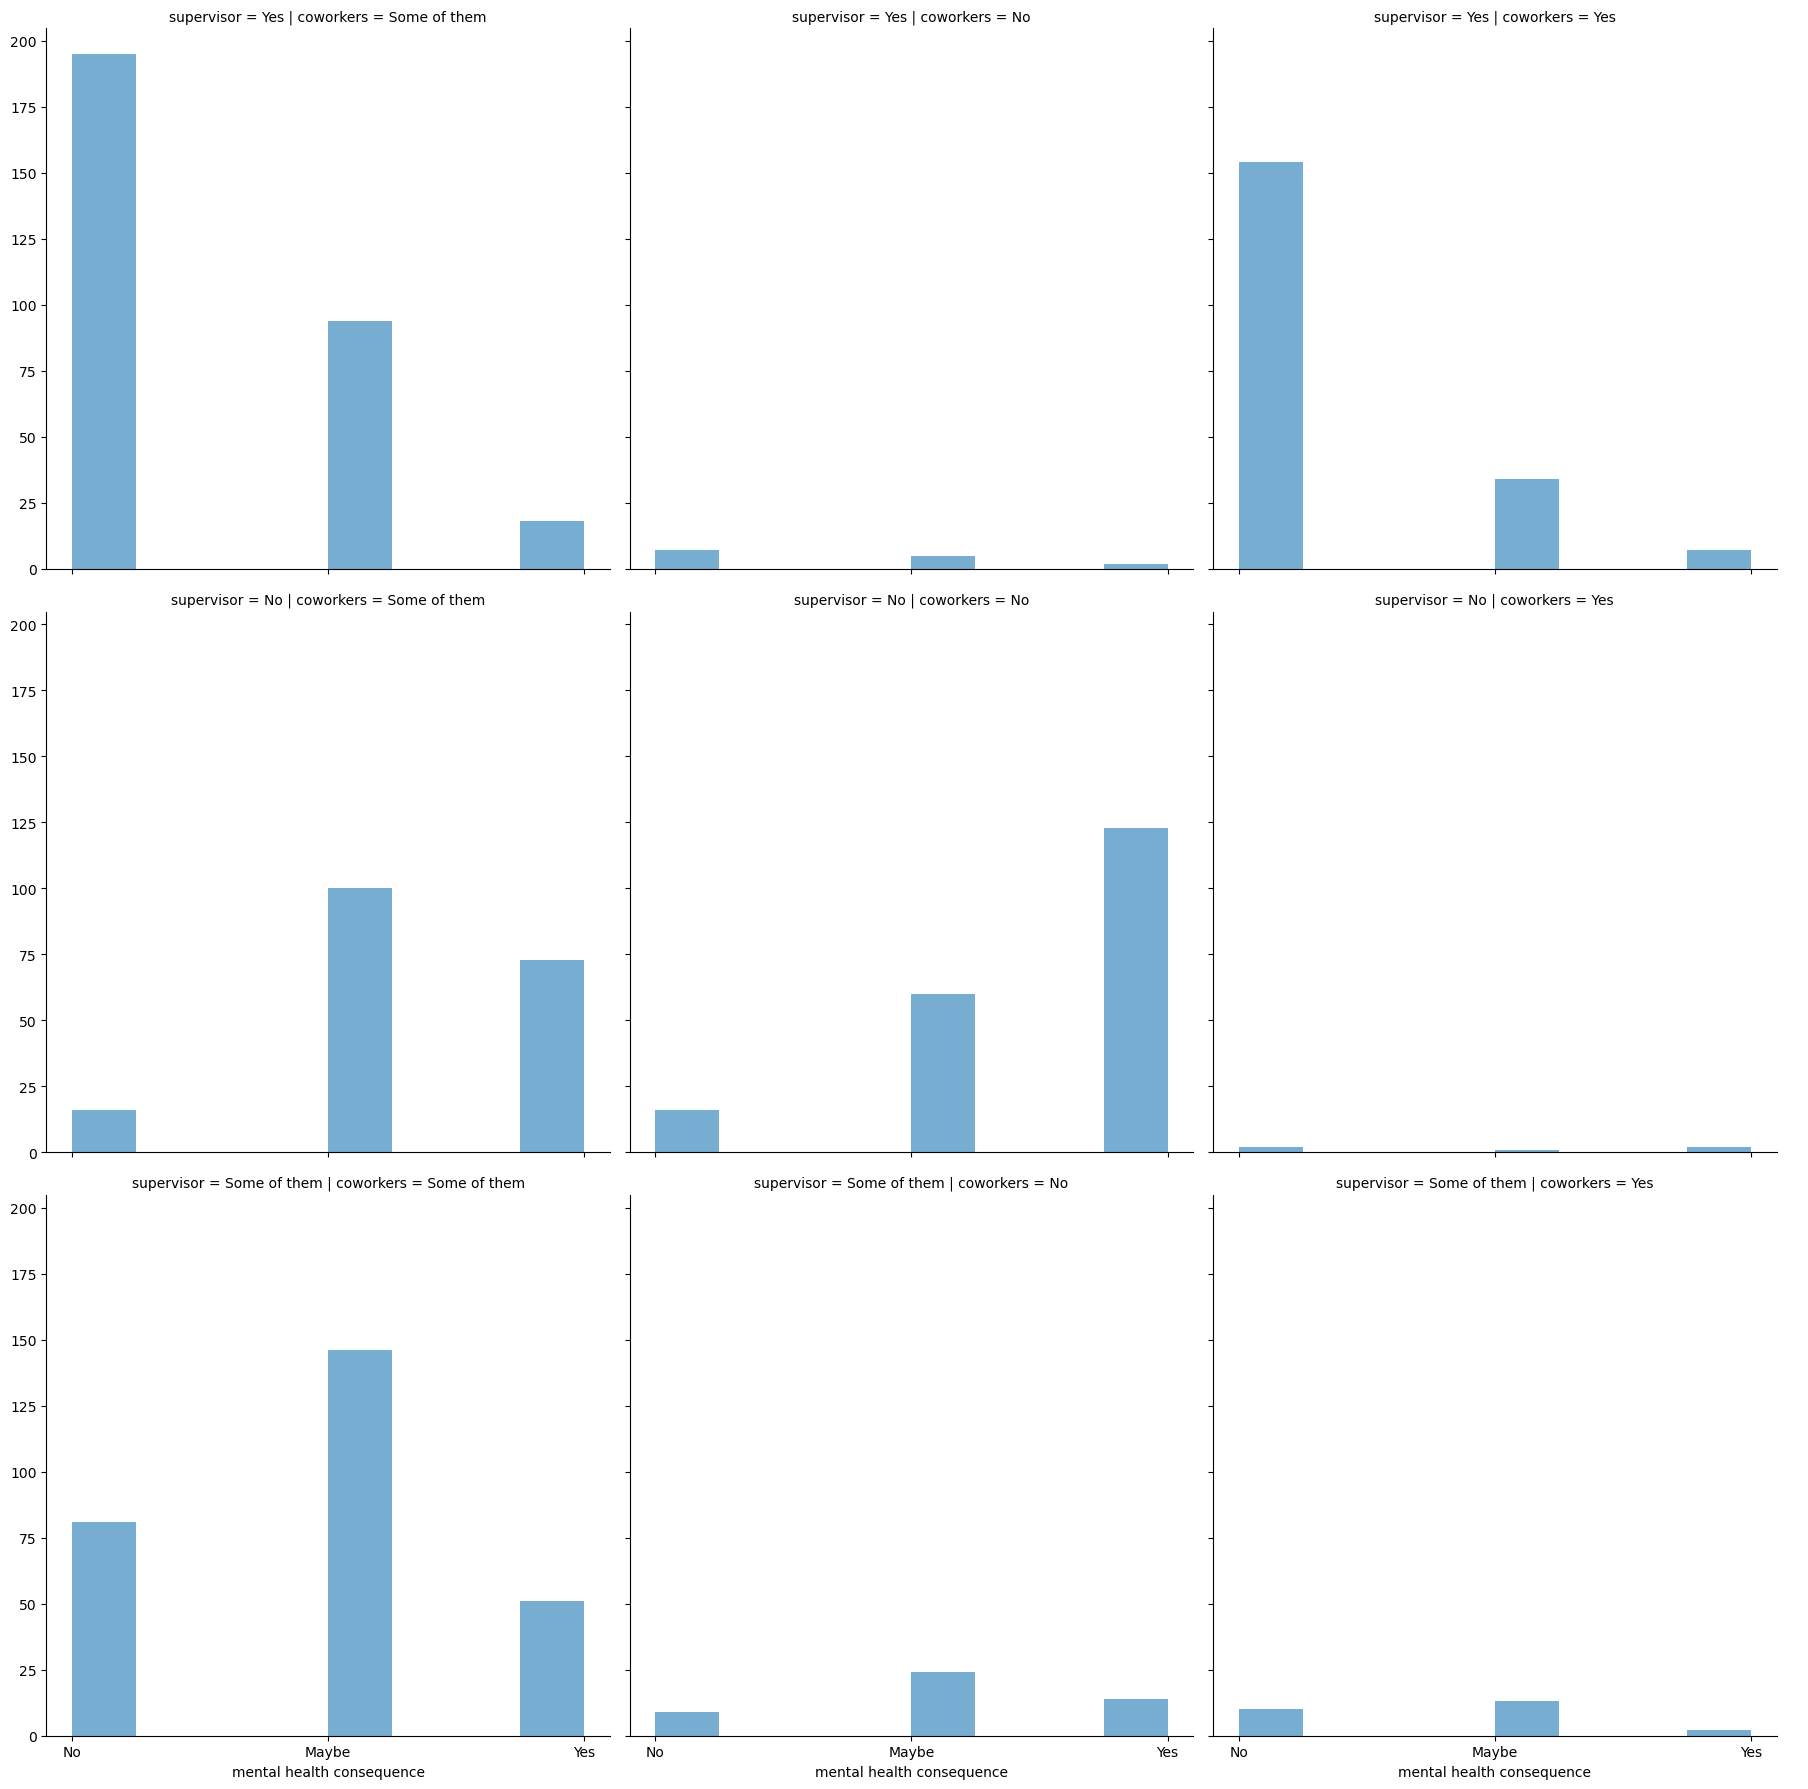

In [41]:
g = sns.FacetGrid(data_df, row = 'supervisor', col = 'coworkers', height = 6)
g.map(plt.hist, 'mental health consequence', bins = 8, alpha = 0.6)
g.add_legend()
plt.show()


Following observations can be derived from above.

- Overall 67% feel difficult to discuss the MH issues with employer, hence never discussed.

- Out of those, around 62% male who have active mental health issues have not discussed with their current employer.

- More than half (73%) males who have mental health issues have discussed with their co-workers.

- Almost all who have MH and discussed with employer have openly discuss with co workers, while there are a lot of those who have not discuss with employer but have discussd with co worker, suggesting they are affraid of negative consequences.

#### Seek Help?

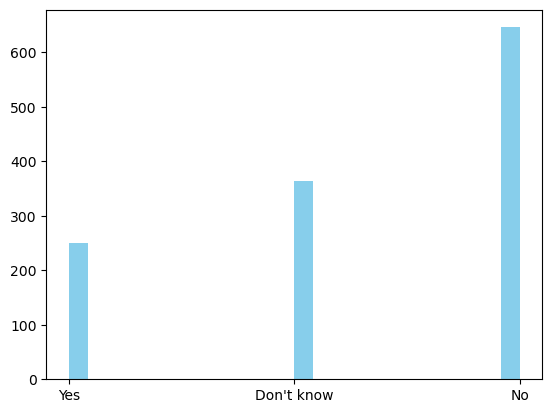

In [42]:
plt.hist(data_df['seek help'], bins=24, color = "skyblue")
plt.show()


Following observations can be derived from above.

- More than half of the respondents do not seek help.

### Predictions

In [43]:
data2 = pd.get_dummies(data_df, drop_first=True)
print(data2.shape)
data2.columns

(1259, 138)


Index(['Age', 'Gender_Male', 'Gender_Other', 'Country_Austria',
       'Country_Bahamas, The', 'Country_Belgium',
       'Country_Bosnia and Herzegovina', 'Country_Brazil', 'Country_Bulgaria',
       'Country_Canada',
       ...
       'coworkers_Yes', 'supervisor_Some of them', 'supervisor_Yes',
       'mental health interview_No', 'mental health interview_Yes',
       'physical health interview_No', 'physical health interview_Yes',
       'mental vs physical_No', 'mental vs physical_Yes',
       'obs consequence_Yes'],
      dtype='object', length=138)

In [44]:
X = data2.drop(['mental health consequence_Yes', 'Age'], axis=1)
y = data2['mental health consequence_Yes']

In [45]:
#Categorical feature selection
from sklearn.feature_selection import SelectKBest, chi2

sf = SelectKBest(chi2, k='all')
sf_fit = sf.fit(X, y)

#Print feature scores
for i in range(len(sf_fit.scores_)):
    print(' %s: %f' % (X.columns[i], sf_fit.scores_[i]))

 Gender_Male: 0.952859
 Gender_Other: 6.454435
 Country_Austria: 0.905895
 Country_Bahamas, The: 3.311644
 Country_Belgium: 0.346335
 Country_Bosnia and Herzegovina: 0.301965
 Country_Brazil: 1.811789
 Country_Bulgaria: 0.007332
 Country_Canada: 0.038091
 Country_China: 0.301965
 Country_Colombia: 0.806804
 Country_Costa Rica: 0.301965
 Country_Croatia: 0.806804
 Country_Czech Republic: 0.301965
 Country_Denmark: 0.603930
 Country_Finland: 3.182847
 Country_France: 1.753429
 Country_Georgia: 3.311644
 Country_Germany: 3.687441
 Country_Greece: 6.623288
 Country_Hungary: 3.311644
 Country_India: 1.585704
 Country_Ireland: 4.667108
 Country_Israel: 0.028616
 Country_Italy: 0.311768
 Country_Japan: 3.311644
 Country_Latvia: 0.301965
 Country_Mexico: 0.905895
 Country_Moldova: 0.301965
 Country_Netherlands: 1.063915
 Country_New Zealand: 3.227217
 Country_Nigeria: 0.301965
 Country_Norway: 0.301965
 Country_Philippines: 3.311644
 Country_Poland: 2.113754
 Country_Portugal: 0.806804
 Countr

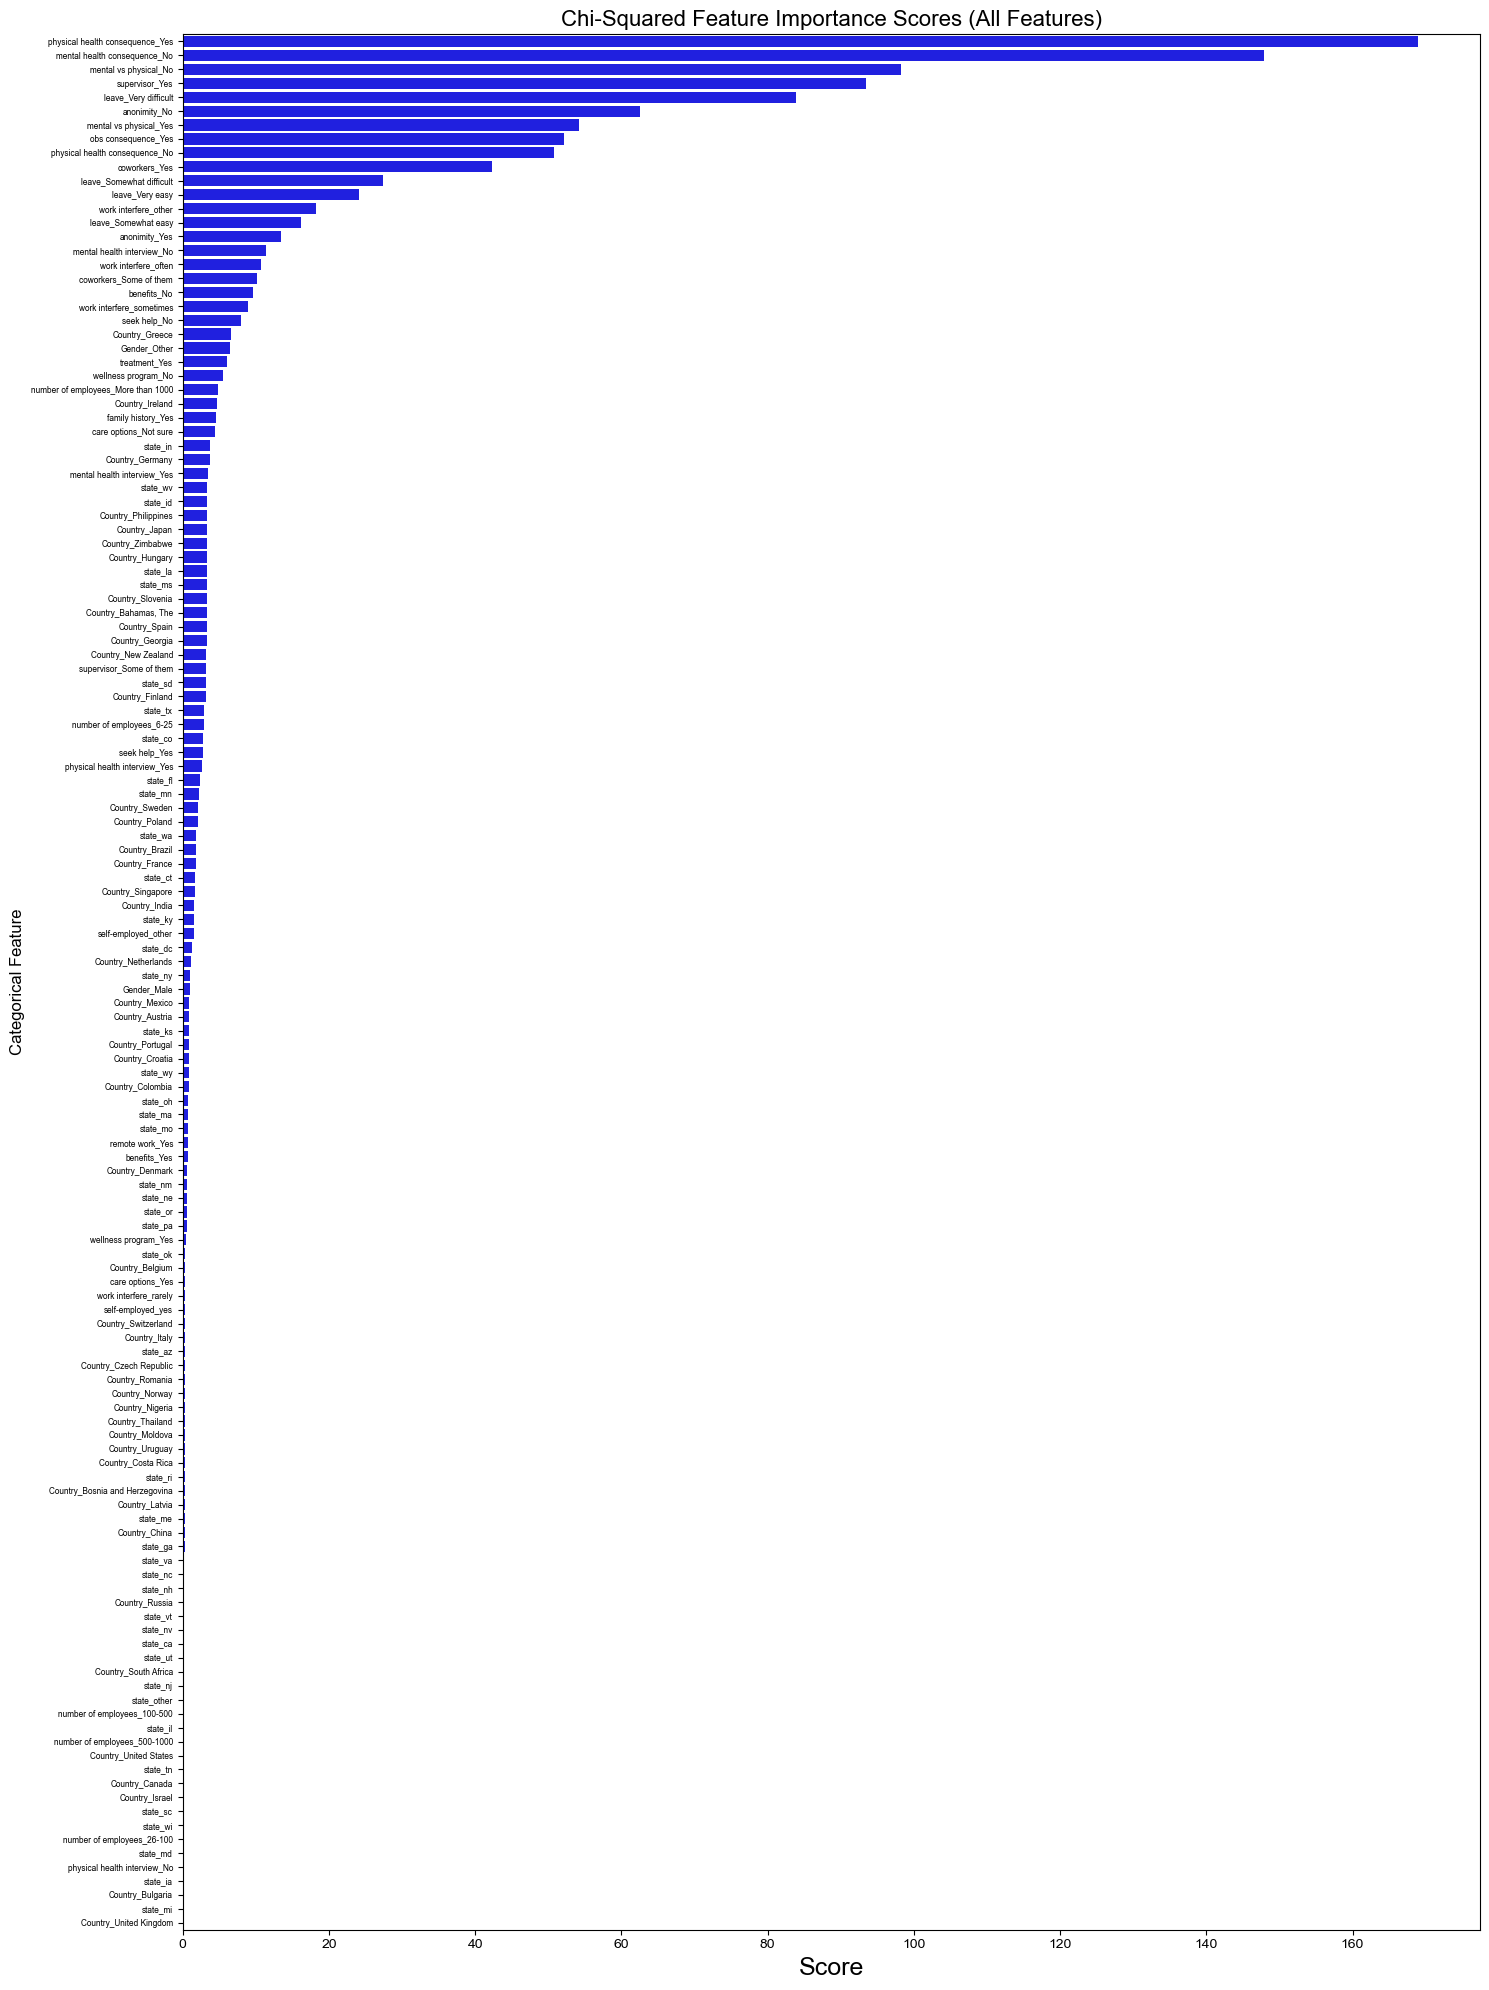

In [46]:
# Feature selection (your existing code)
sf = SelectKBest(chi2, k='all')  # k='all' selects all features
sf_fit = sf.fit(X, y)


# Create DataFrame for plotting (No filtering/truncating)
datset = pd.DataFrame({'feature': X.columns, 'scores': sf_fit.scores_})
datset = datset.sort_values(by='scores', ascending=False)  # Still sort for best visualization


# Create barplot (adjust figure size as needed)
plt.figure(figsize=(15, 20))  # Increased height for more features
sns.barplot(x='scores', y='feature', data=datset, color='blue')
sns.set_style('whitegrid')
plt.ylabel('Categorical Feature', fontsize=12)
plt.xlabel('Score', fontsize=18)
plt.title('Chi-Squared Feature Importance Scores (All Features)', fontsize=16)
plt.yticks(rotation=0, fontsize=6)  # Smaller font and rotation for readability
plt.tight_layout()
plt.show()